In [7]:
import pandas as pd
import h5py
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [9]:
dataset_path = glob.glob('/home/ubuntu/MillionSongSubset/*/*/*/*.h5')
len(dataset_path)

10000

In [10]:
total_size = 0
for file in dataset_path:
    if os.path.isfile(file):
        total_size += os.path.getsize(file)
print("Total size of files: {:.2f} GB".format(total_size/(1024*1024*1024)))

Total size of files: 2.52 GB


In [11]:
dataset_path = '/home/ubuntu/MillionSongSubset/*/*/*/*.h5'
metadata_rows = []
for file_path in glob.glob(dataset_path):
    with h5py.File(file_path, 'r') as f:
        metadata = f['/metadata/songs']
        column_names = list(metadata.dtype.names)
        metadata_dict = {}
        for column_name in column_names:
            metadata_dict[column_name] = metadata[column_name][0]
        metadata_rows.append(metadata_dict)
metadata_df = pd.DataFrame(metadata_rows)
print(metadata_df.head())

  analyzer_version  artist_7digitalid  artist_familiarity  artist_hotttnesss  \
0              b''                215            0.775600           0.434923   
1              b''              80602            0.606193           0.407344   
2              b''               6884            0.755041           0.458592   
3              b''               2852            0.506127           0.350788   
4              b''                983            0.741518           0.520412   

               artist_id  artist_latitude               artist_location  \
0  b'AR19QNR1187B9A13C5'              NaN           b'Philadelphia, PA'   
1  b'AR2MEUK1187B992D1B'              NaN                           b''   
2  b'ARE0OLY1187B9AD19F'         40.79263     b'Whitestone, Queens, NY'   
3  b'AR5GLIU1187FB4638A'              NaN                b'Memphis, TN'   
4  b'AR1ZKBE1187FB53629'              NaN  b'D\xef\xbf\xbdorf, Germany'   

   artist_longitude                              artist_mbid  \
0   

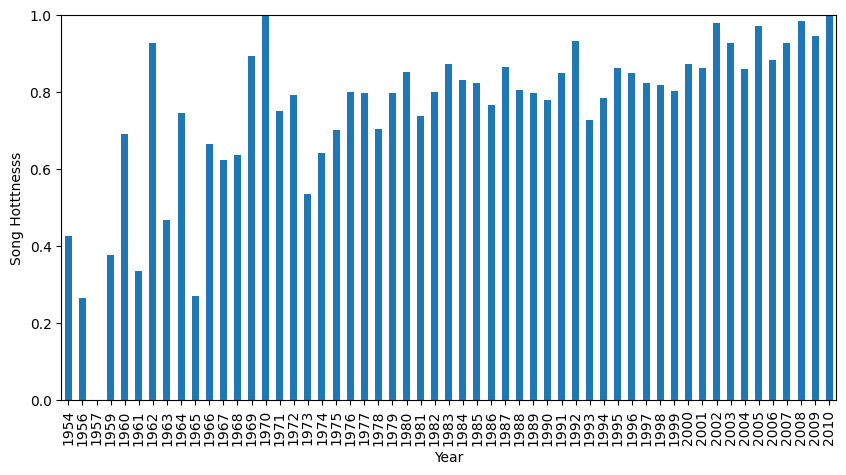

In [14]:
"""
The 'song_hotttnesss' value ranges from 0.0 to 1.0.
1- The number of times the song has been played on the radio
2- The number of times it has been downloaded
3- The number of times it has been favorited by users on social media platforms.
"""
dataset_path = '/home/ubuntu/MillionSongSubset/*/*/*/*.h5'
table_rows = []
for file_path in glob.glob(dataset_path):
    with h5py.File(file_path, 'r') as f:
        song_hotttnesss = f['/metadata/songs']['song_hotttnesss'][:]
        year = f['/musicbrainz/songs']['year'][:]
        song_id = f['/metadata/songs']['song_id'][:]
        genre = f['/metadata/songs']['genre'][:]
        for i in range(len(song_hotttnesss)):
            if not np.isnan(song_hotttnesss[i]) and year[i]:
                if year[i] == 0:
                    year_str = "N/A"
                else:
                    year_str = str(year[i])
                table_rows.append([song_id[i], song_hotttnesss[i], year_str, genre[i]])
table_rows.sort(key=lambda x: x[1], reverse=True)
df = pd.DataFrame(table_rows, columns=['Song ID', 'Song Hotttnesss', 'Year', 'Genre'])
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
fig, ax = plt.subplots(figsize=(10, 5))


max_hotttnesss = df.groupby('Year')['Song Hotttnesss'].max()
max_hotttnesss.plot(kind='bar', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Song Hotttnesss')
ax.set_ylim([0, 1])
plt.show()

In [15]:
df = df.sort_values(by=['Song Hotttnesss'], ascending=False)
print(df.head(10))

                 Song ID  Song Hotttnesss  Year Genre
0  b'SOAAXAK12A8C13C030'         1.000000  1970   b''
1  b'SOULTKQ12AB018A183'         1.000000  2010   b''
2  b'SOWFUUS12AB01800E7'         0.984347  2008   b''
3  b'SOOXLKF12A6D4F594A'         0.979837  2002   b''
4  b'SOMKGQN12A8C1339D2'         0.972387  2005   b''
5  b'SOOPVJI12AB0183957'         0.945995  2009   b''
6  b'SOUXEOI12A6D4FB18E'         0.932274  1992   b''
7  b'SOFDYGC12A6D4F9059'         0.928617  2003   b''
8  b'SOKYXSZ12A6D4F6E92'         0.928367  1962   b''
9  b'SOZIMLB12AF72AD1CD'         0.927133  2007   b''


In [16]:
print(metadata_df['genre'])
unique_genres = metadata_df['genre'].unique()
print(unique_genres)

0       b''
1       b''
2       b''
3       b''
4       b''
       ... 
9995    b''
9996    b''
9997    b''
9998    b''
9999    b''
Name: genre, Length: 10000, dtype: object
[b'']


In [17]:
"""
b: Blues
c: Classical
e: Electronic
f: Electronic
j: Jazz
m: Metal
p: Pop
r: Hip-hop/Rap
s: Soul/R&B
r: Rock
"""

'\nb: Blues\nc: Classical\ne: Electronic\nf: Electronic\nj: Jazz\nm: Metal\np: Pop\nr: Hip-hop/Rap\ns: Soul/R&B\nr: Rock\n'

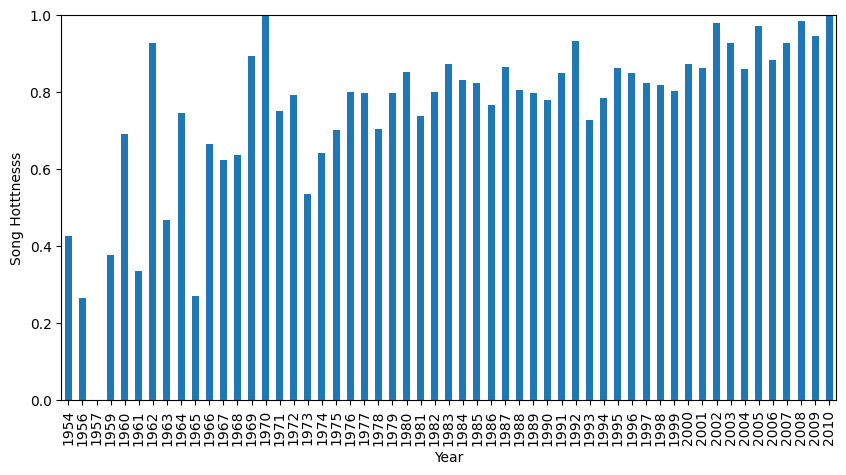

                 Song ID                                          Song Name  \
0  b'SOAAXAK12A8C13C030'                     Immigrant Song (Album Version)   
1  b'SOULTKQ12AB018A183'  Nothin' On You [feat. Bruno Mars] (Album Version)   
2  b'SOWFUUS12AB01800E7'         If Today Was Your Last Day (Album Version)   
3  b'SOOXLKF12A6D4F594A'                                  Harder To Breathe   
4  b'SOMKGQN12A8C1339D2'                                        Blue Orchid   
5  b'SOOPVJI12AB0183957'                                       Just Say Yes   
6  b'SOUXEOI12A6D4FB18E'           They Reminisce Over You (Single Version)   
7  b'SOFDYGC12A6D4F9059'                                     Inertiatic Esp   
8  b'SOKYXSZ12A6D4F6E92'                                    The Loco-Motion   
9  b'SOZIMLB12AF72AD1CD'                                          Innocence   

   Song Hotttnesss  Year Genre  
0         1.000000  1970   b''  
1         1.000000  2010   b''  
2         0.984347  2008   b'' 

In [19]:
dataset_path = '/home/ubuntu/MillionSongSubset/*/*/*/*.h5'
table_rows = []
for file_path in glob.glob(dataset_path):
    with h5py.File(file_path, 'r') as f:
        song_hotttnesss = f['/metadata/songs']['song_hotttnesss'][:]
        year = f['/musicbrainz/songs']['year'][:]
        song_id = f['/metadata/songs']['song_id'][:]
        genre = f['/metadata/songs']['genre'][:]
        title = f['/metadata/songs']['title'][:]
        for i in range(len(song_hotttnesss)):
            if not np.isnan(song_hotttnesss[i]) and year[i]:
                if year[i] == 0:
                    year_str = "N/A"
                else:
                    year_str = str(year[i])
                table_rows.append([song_id[i], title[i].decode("utf-8"), song_hotttnesss[i], year_str, genre[i]])
table_rows.sort(key=lambda x: x[2], reverse=True)
df = pd.DataFrame(table_rows, columns=['Song ID', 'Song Name', 'Song Hotttnesss', 'Year', 'Genre'])
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
fig, ax = plt.subplots(figsize=(10, 5))
max_hotttnesss = df.groupby('Year')['Song Hotttnesss'].max()
max_hotttnesss.plot(kind='bar', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Song Hotttnesss')
ax.set_ylim([0, 1])
plt.show()
df = df.sort_values(by=['Song Hotttnesss'], ascending=False)
print(df.head(10))